In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
import os
import statsmodels.api as sm

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from scipy import stats

from sklearn.linear_model import Ridge

In [2]:
# Check and change the current working directory - A.F.
print(os.getcwd())
os.chdir(Path().resolve())
# read in data set with first column (district name) set to index
df = pd.read_excel("../Data/cleaned_data_encoded.xlsx", index_col =0)

c:\Users\Amanda\Documents\Capstone\DSE6311OM_Group3\Notebook


## OLS Model - A.F.

In [3]:
# create a copy of the dataframe for OLS model
OLS_df = df.copy()

# drop columns for features not to be used in model
OLS_df = OLS_df.drop(columns = ['still_in_school_pct', 
                        'dropout_rate_pct', 
                        "overall_classification_Not requiring assistance or intervention",
                        "overall_classification_Requiring assistance or intervention",
                        "reason_for_classification_In need of broad/comprehensive support",
                        "reason_for_classification_In need of focused/targeted support",
                        "reason_for_classification_Limited or no progress toward targets",
                        "reason_for_classification_Meeting or exceeding targets",
                        "reason_for_classification_Moderate progress toward targets",
                        "reason_for_classification_Substantial progress toward targets"])

OLS_df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,non_grad_completers_pct,hs_equivalency_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,
Abington,11.0,17.8,39,3.560342e+07,16609.95,88.9,0.7,0.0,13.9,81.3,37848.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,1.005648e+08,19407.68,96.1,0.2,0.0,13.0,88.3,69189.5,18.426312,20.10
Agawam,6.2,18.3,46,7.195848e+07,20414.91,88.0,1.9,0.4,12.5,89.4,31126.0,18.091600,46.05
Amesbury,2.7,23.7,47,3.996617e+07,22338.70,88.3,0.8,0.8,10.6,89.0,41139.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,3.248902e+07,26177.60,90.9,0.9,0.9,10.2,81.3,34325.0,17.296413,36.90


In [4]:
# drop 'in_district_expenditures' and use 'log_in_district_expenditures' instead
OLS_df = OLS_df.drop(columns = ['in_district_expenditures'])
OLS_df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,non_grad_completers_pct,hs_equivalency_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,
Abington,11.0,17.8,39,16609.95,88.9,0.7,0.0,13.9,81.3,37848.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,19407.68,96.1,0.2,0.0,13.0,88.3,69189.5,18.426312,20.10
Agawam,6.2,18.3,46,20414.91,88.0,1.9,0.4,12.5,89.4,31126.0,18.091600,46.05
Amesbury,2.7,23.7,47,22338.70,88.3,0.8,0.8,10.6,89.0,41139.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,26177.60,90.9,0.9,0.9,10.2,81.3,34325.0,17.296413,36.90


In [6]:
# split into test and training sets
# test train split from sklearn.model_selection import train_test_split

# Define features and target variable
OLS_X = OLS_df.drop(columns=['graduation_rate_pct'])
OLS_y = OLS_df['graduation_rate_pct']

# Split the data into training and testing sets
OLS_X_train, OLS_X_test, OLS_y_train, OLS_y_test = train_test_split(OLS_X, OLS_y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {OLS_X_train.shape}")
print(f"X_test shape: {OLS_X_test.shape}")
print(f"y_train shape: {OLS_y_train.shape}")
print(f"y_test shape: {OLS_y_test.shape}")

X_train shape: (178, 11)
X_test shape: (45, 11)
y_train shape: (178,)
y_test shape: (45,)


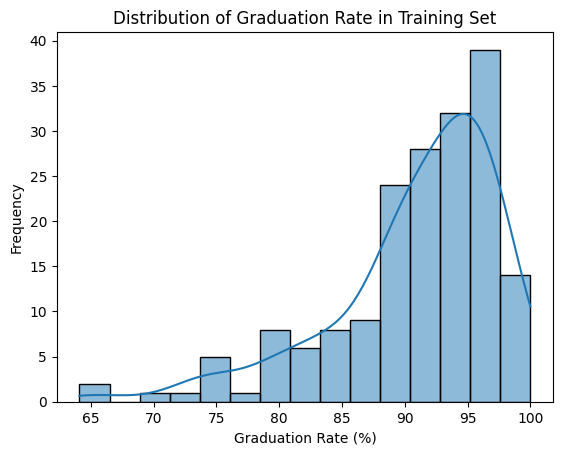

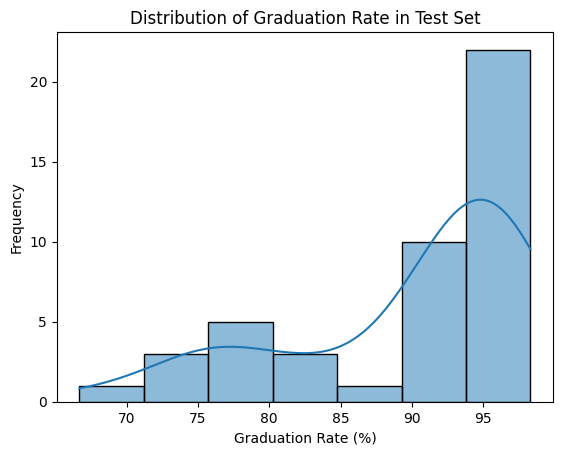

In [7]:
#check the training and test set distributions

# Plot the distribution of the target variable
sns.histplot(OLS_y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(OLS_y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

In [8]:
# scale the features

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
OLS_X_train_scaled = scaler.fit_transform(OLS_X_train)
OLS_X_test_scaled = scaler.transform(OLS_X_test)
# Convert the scaled arrays back to DataFrames
OLS_X_train_scaled = pd.DataFrame(OLS_X_train_scaled, columns=OLS_X_train.columns, index=OLS_X_train.index)
OLS_X_test_scaled = pd.DataFrame(OLS_X_test_scaled, columns=OLS_X_test.columns, index=OLS_X_test.index)


In [9]:
# create OLS
OLS_X_train_scaled_const = sm.add_constant(OLS_X_train_scaled) #adds a constant term to the predictor
ols_model = sm.OLS(OLS_y_train, OLS_X_train_scaled_const).fit()


# Print the summary of the OLS model
results = ols_model.summary()
print(results)

                             OLS Regression Results                            
Dep. Variable:     graduation_rate_pct   R-squared:                       0.763
Model:                             OLS   Adj. R-squared:                  0.748
Method:                  Least Squares   F-statistic:                     48.70
Date:                 Fri, 22 Aug 2025   Prob (F-statistic):           3.14e-46
Time:                         14:10:30   Log-Likelihood:                -463.01
No. Observations:                  178   AIC:                             950.0
Df Residuals:                      166   BIC:                             988.2
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

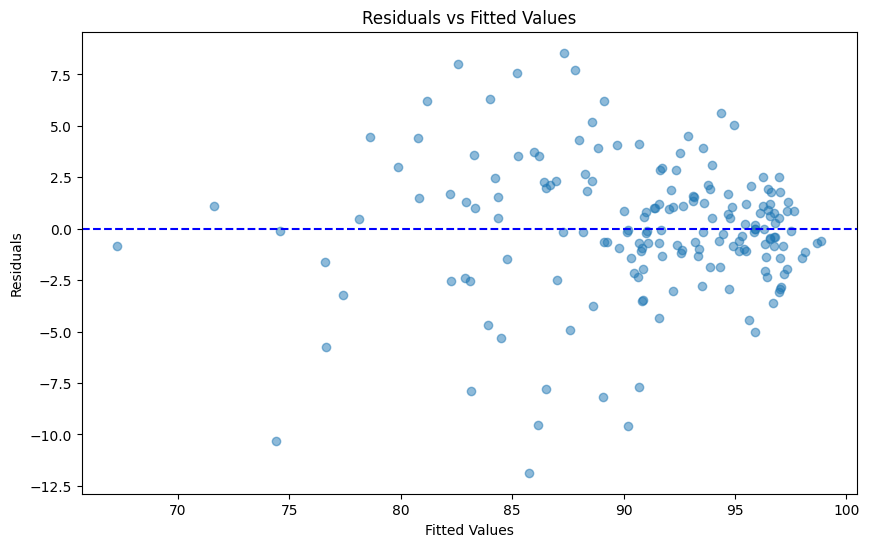

In [11]:
# check linearity based on residuals
# Calculate residuals
OLS_fitted_values = ols_model.fittedvalues
OLS_residuals = OLS_y_train - OLS_fitted_values

# standardized residuals, leverage, and Cook's distance
influence = OLSInfluence(ols_model)
stud_resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(OLS_fitted_values, OLS_residuals, alpha=0.5)
plt.axhline(0, color='blue', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

<Figure size 1000x600 with 0 Axes>

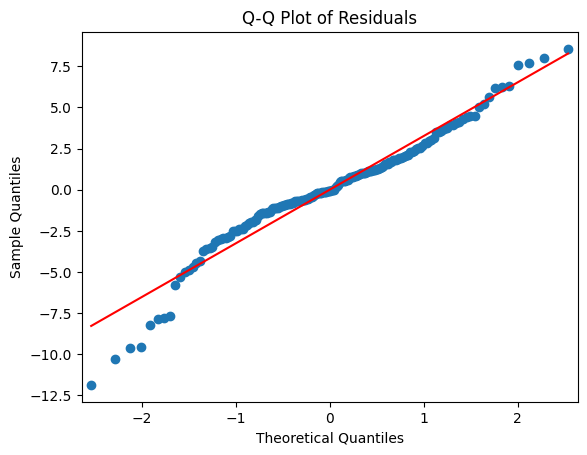

In [12]:
# check normality of residuals
# Q-Q plot for residuals
plt.figure(figsize=(10, 6))
qqplot(OLS_residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [13]:
# check homoscedasticity
# Breusch-Pagan test for homoscedasticity
OLS_bp_test = het_breuschpagan(OLS_residuals, OLS_X_train_scaled_const)
print(f"Breusch-Pagan: LM={OLS_bp_test[0]:.3f}, p={OLS_bp_test[1]:.4f} | F={OLS_bp_test[2]:.3f}, p={OLS_bp_test[3]:.4f}")

# White test for homoscedasticity
OLS_white_test = het_white(OLS_residuals, OLS_X_train_scaled_const)
print(f"White test:     LM={OLS_white_test[0]:.3f}, p={OLS_white_test[1]:.4f} | F={OLS_white_test[2]:.3f}, p={OLS_white_test[3]:.4f}")


Breusch-Pagan: LM=36.727, p=0.0001 | F=3.923, p=0.0000
White test:     LM=110.142, p=0.0079 | F=2.108, p=0.0002


In [14]:
# check independence
# Durbin-Watson test for independence of residuals
OLS_dw_statistic = durbin_watson(OLS_residuals)
print(f"Durbin-Watson statistic: {OLS_dw_statistic:.3f}")

Durbin-Watson statistic: 1.925


In [15]:
# check for multicollinearity

if hasattr(OLS_X_train_scaled_const, 'columns'):
    feature_names = list(OLS_X_train_scaled_const.columns)
else:
    feature_names = [f"x{i} for i in range(x_train_scaled_const.shape[1])]"]

OLS_X_vif = pd.DataFrame(ols_model.model.exog, columns=feature_names)

OLS_vif_df = pd.DataFrame({
    "feature": OLS_X_vif.columns,
    "VIF": [variance_inflation_factor(OLS_X_vif.values, i) for i in range(OLS_X_vif.shape[1])]
})

print("\nVIFs:")
print(OLS_vif_df.sort_values(by="VIF", ascending=False))


VIFs:
                                    feature       VIF
11                     needs_income_avg_pct  5.005998
1                      english_learners_pct  3.961176
4        in_district_expenditures_per_pupil  2.655401
7                     student_teacher_ratio  2.569548
9                     DOR_income_per_capita  2.550181
8                  experienced_teachers_pct  2.177079
10             log_in_district_expenditures  2.133487
3   progress_toward_improvement_targets_pct  2.071353
5                   non_grad_completers_pct  1.790363
2            students_with_disabilities_pct  1.576014
6                        hs_equivalency_pct  1.101457
0                                     const  1.000000


In [16]:
# influential and leverage points
n = OLS_X_vif.shape[0]
p = OLS_X_vif.shape[1]

influence_df = pd.DataFrame({
    "fitted_values": OLS_fitted_values,
    "residuals": OLS_residuals,
    "leverage": OLSInfluence(ols_model).hat_matrix_diag,
    "cooks_d": cooks_d,
})

# simple rule of thumb for leverage points
high_leverage_threshold = 2 * (p / n)
cooks_d_threshold = 4 / n
print(f"\nHigh leverage threshold: {high_leverage_threshold:.3f}")
print(f"\nCook's distance threshold: {cooks_d_threshold:.3f}")
print("Top 20 by Cook's distance:")
print(influence_df.sort_values("cooks_d", ascending=False).head(20))


High leverage threshold: 0.135

Cook's distance threshold: 0.022
Top 20 by Cook's distance:
                    fitted_values  residuals  leverage   cooks_d
district_name                                                   
Chelsea                 74.398311 -10.298311  0.169181  0.189887
Greenfield              85.759251 -11.859251  0.075775  0.091140
Ware                    86.152051  -9.552051  0.082685  0.065495
Milford                 83.165556  -7.865556  0.113775  0.065470
Nantucket               87.344645   8.555355  0.089841  0.057988
Ralph C Mahar           86.510849  -7.810849  0.101508  0.056039
Avon                    87.806826   7.693174  0.097363  0.051666
Webster                 76.658657  -5.758657  0.128206  0.040865
Monson                  79.884994   3.015006  0.297795  0.040104
Uxbridge                90.191161  -9.591161  0.048978  0.036391
Springfield             78.616909   4.483091  0.147370  0.029762
Quabbin                 90.680178  -7.680178  0.060313  0.0294

In [17]:
high_leverage_threshold = 2 * (p / n)
cooks_d_threshold = 4 / n
print(f"\nHigh leverage threshold: {high_leverage_threshold:.3f}")
print(f"\nCook's distance threshold: {cooks_d_threshold:.3f}")
print("Top 20 by leverage:")
print(influence_df.sort_values("leverage", ascending=False).head(20))


High leverage threshold: 0.135

Cook's distance threshold: 0.022
Top 20 by leverage:
                      fitted_values  residuals  leverage   cooks_d
district_name                                                     
Weston                    95.340229  -0.340229  0.519017  0.001897
Southern Berkshire        88.363502   1.836498  0.330251  0.018139
Monson                    79.884994   3.015006  0.297795  0.040104
Southbridge               67.249846  -0.849846  0.266670  0.002616
Falmouth                  89.124549  -0.624549  0.237562  0.001164
Boston                    82.884588  -2.384588  0.198751  0.012860
Dover-Sherborn            96.961390   0.538610  0.185642  0.000593
Martha's Vineyard         86.679354   2.120646  0.181646  0.008911
Framingham                76.603653  -1.603653  0.179440  0.005007
Blackstone-Millville      86.956703   2.343297  0.173775  0.010211
Cambridge                 90.936932   0.563068  0.170411  0.000573
Chelsea                   74.398311 -10.298

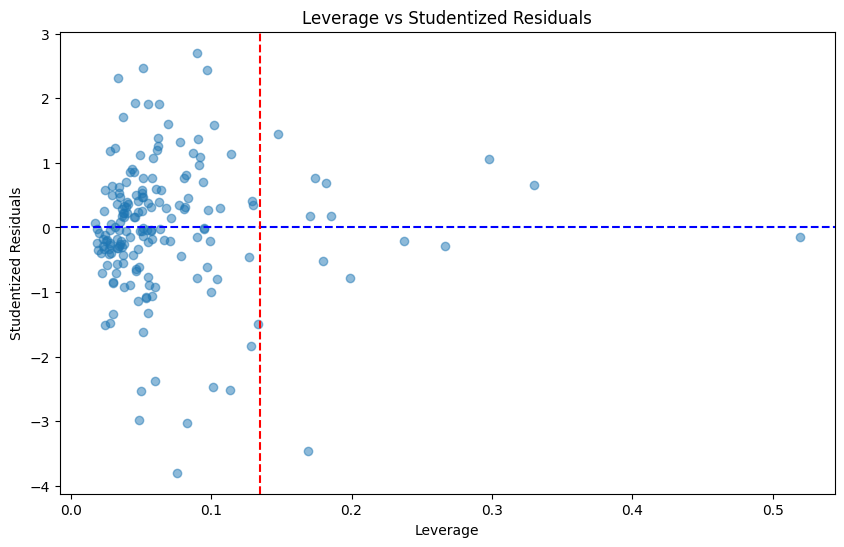

In [18]:
# leverage vs studentized residuals (influence plot)
plt.figure(figsize=(10, 6))
plt.scatter(leverage, stud_resid, alpha=0.5)
plt.axhline(0, color='blue', linestyle='--')
plt.axvline(high_leverage_threshold, color='red', linestyle='--')
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.title("Leverage vs Studentized Residuals")
plt.show()

## Re-fit with heteroskedascity-consistent (HC) standard errors - A.F.

In [19]:
# re-fit OLS with heteroskedasticity-consistent (HC) standard errors
ols_model_hc = sm.OLS(OLS_y_train, OLS_X_train_scaled_const).fit(cov_type='HC3')

# Print the summary of the OLS model with HC standard errors
summary_ols_model_hc = ols_model_hc.summary()
print(summary_ols_model_hc)

                             OLS Regression Results                            
Dep. Variable:     graduation_rate_pct   R-squared:                       0.763
Model:                             OLS   Adj. R-squared:                  0.748
Method:                  Least Squares   F-statistic:                     48.17
Date:                 Fri, 22 Aug 2025   Prob (F-statistic):           6.26e-46
Time:                         14:10:44   Log-Likelihood:                -463.01
No. Observations:                  178   AIC:                             950.0
Df Residuals:                      166   BIC:                             988.2
Df Model:                           11                                         
Covariance Type:                   HC3                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

## Re-run OLS Model after log transformation of response variable, graduation_rate_pct. - A.F.

In [20]:
df["log_graduation_rate_pct"] = np.log(df['graduation_rate_pct'])
log_df = df.drop(columns = ['graduation_rate_pct'])
log_df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,still_in_school_pct,non_grad_completers_pct,hs_equivalency_pct,dropout_rate_pct,student_teacher_ratio,...,overall_classification_Requiring assistance or intervention,reason_for_classification_In need of broad/comprehensive support,reason_for_classification_In need of focused/targeted support,reason_for_classification_Limited or no progress toward targets,reason_for_classification_Meeting or exceeding targets,reason_for_classification_Moderate progress toward targets,reason_for_classification_Substantial progress toward targets,log_in_district_expenditures,needs_income_avg_pct,log_graduation_rate_pct
district_name,,,,,,,,,,,,,,,,,,,,,
Abington,11.0,17.8,39,3.560342e+07,16609.95,1.3,0.7,0.0,9.2,13.9,...,0,0,0,0,0,1,0,17.387952,40.85,4.487512
Acton-Boxborough,6.2,15.5,85,1.005648e+08,19407.68,3.2,0.2,0.0,0.4,13.0,...,0,0,0,0,1,0,0,18.426312,20.10,4.565389
Agawam,6.2,18.3,46,7.195848e+07,20414.91,1.1,1.9,0.4,8.6,12.5,...,0,0,0,0,0,1,0,18.091600,46.05,4.477337
Amesbury,2.7,23.7,47,3.996617e+07,22338.70,2.5,0.8,0.8,7.5,10.6,...,0,0,0,0,0,1,0,17.503544,40.10,4.480740
Amherst-Pelham,7.3,24.2,33,3.248902e+07,26177.60,4.1,0.9,0.9,3.2,10.2,...,1,0,1,0,0,0,0,17.296413,36.90,4.509760


In [22]:
# split into test and training sets
# test train split from sklearn.model_selection import train_test_split

# Define features and target variable
log_X = df.drop(columns=['log_graduation_rate_pct'])
log_y = df['log_graduation_rate_pct']

# Split the data into training and testing sets
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(log_X, log_y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {log_X_train.shape}")
print(f"X_test shape: {log_X_test.shape}")
print(f"y_train shape: {log_y_train.shape}")
print(f"y_test shape: {log_y_test.shape}")

X_train shape: (178, 23)
X_test shape: (45, 23)
y_train shape: (178,)
y_test shape: (45,)


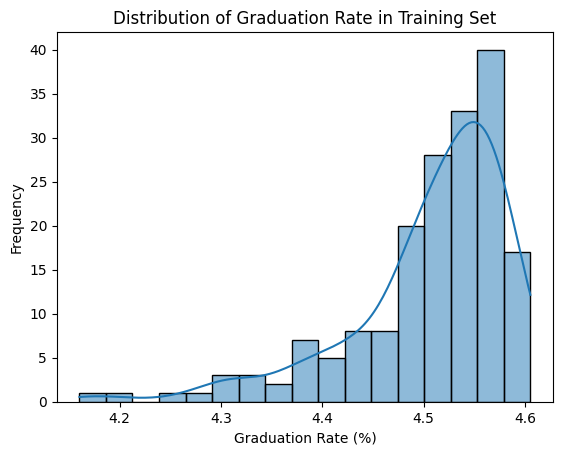

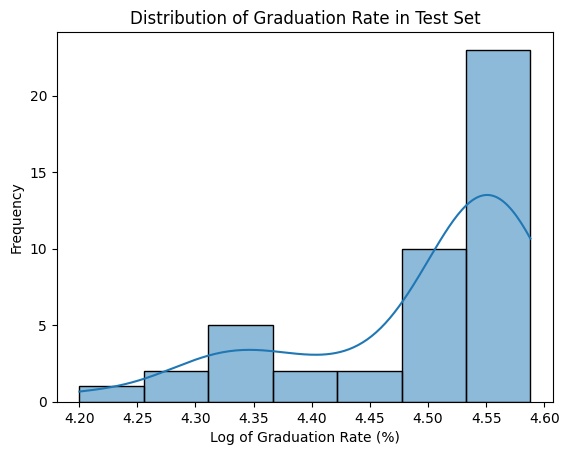

In [23]:
#check the training and test set distributions

# Plot the distribution of the target variable
sns.histplot(log_y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(log_y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Log of Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

In [24]:
# scale the features

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
log_X_train_scaled = scaler.fit_transform(log_X_train)
log_X_test_scaled = scaler.transform(log_X_test)
# Convert the scaled arrays back to DataFrames
log_X_train_scaled = pd.DataFrame(log_X_train_scaled, columns=log_X_train.columns, index=log_X_train.index)
log_X_test_scaled = pd.DataFrame(log_X_test_scaled, columns=log_X_test.columns, index=log_X_test.index)

In [25]:
# create OLS
log_X_train_scaled_const = sm.add_constant(log_X_train_scaled) #adds a constant term to the predictor
log_ols_model = sm.OLS(log_y_train, log_X_train_scaled_const).fit()


# Print the summary of the OLS model
results = log_ols_model.summary()
print(results)

                               OLS Regression Results                              
Dep. Variable:     log_graduation_rate_pct   R-squared:                       0.998
Model:                                 OLS   Adj. R-squared:                  0.998
Method:                      Least Squares   F-statistic:                     3821.
Date:                     Fri, 22 Aug 2025   Prob (F-statistic):          7.38e-200
Time:                             14:11:10   Log-Likelihood:                 745.94
No. Observations:                      178   AIC:                            -1452.
Df Residuals:                          158   BIC:                            -1388.
Df Model:                               19                                         
Covariance Type:                 nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

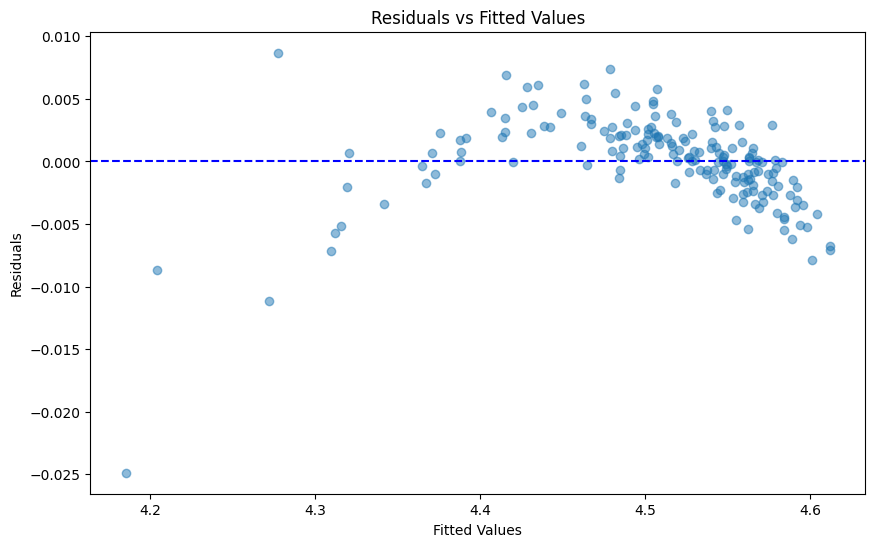

In [26]:
# check linearity based on residuals
# Calculate residuals
log_fitted_values = log_ols_model.fittedvalues
log_residuals = log_y_train - log_fitted_values

# standardized residuals, leverage, and Cook's distance
log_influence = OLSInfluence(log_ols_model)
log_stud_resid = log_influence.resid_studentized_external
log_leverage = log_influence.hat_matrix_diag
log_cooks_d = log_influence.cooks_distance[0]

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(log_fitted_values, log_residuals, alpha=0.5)
plt.axhline(0, color='blue', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

<Figure size 1000x600 with 0 Axes>

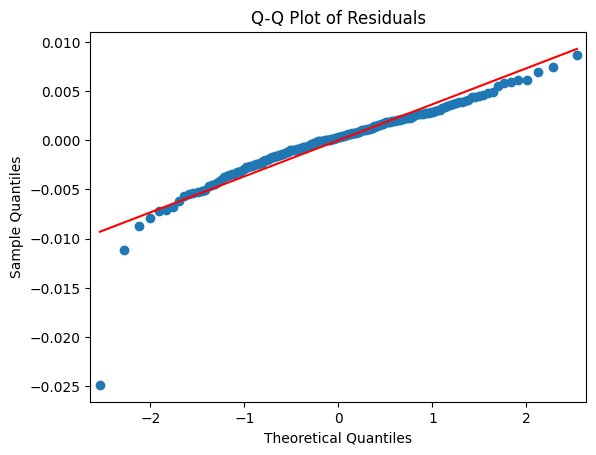

In [27]:
# check normality of residuals
# Q-Q plot for residuals
plt.figure(figsize=(10, 6))
qqplot(log_residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [28]:
# check homoscedasticity
# Breusch-Pagan test for homoscedasticity
log_bp_test = het_breuschpagan(log_residuals, log_X_train_scaled_const)
print(f"Breusch-Pagan: LM={log_bp_test[0]:.3f}, p={log_bp_test[1]:.4f} | F={log_bp_test[2]:.3f}, p={log_bp_test[3]:.4f}")

# White test for homoscedasticity
log_white_test = het_white(log_residuals, log_X_train_scaled_const)
print(f"White test:     LM={log_white_test[0]:.3f}, p={log_white_test[1]:.4f} | F={log_white_test[2]:.3f}, p={log_white_test[3]:.4f}")

Breusch-Pagan: LM=83.044, p=0.0000 | F=7.273, p=0.0000
White test:     LM=177.985, p=0.4230 | F=136.637, p=0.0073


## Ridge Regression model - A.F.

In [29]:
# initialize and train Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Can adjust the alpha parameter when tuning the model
ridge_model.fit(OLS_X_train_scaled, OLS_y_train)

# make predictions and evaluate the model
ridge_y_pred = ridge_model.predict(OLS_X_test_scaled)

# Calculate Mean Squared Error and R-squared
ridge_mse = mean_squared_error(OLS_y_test, ridge_y_pred)
ridge_r2 = r2_score(OLS_y_test, ridge_y_pred)
print(f"Mean Squared Error: {ridge_mse:.3f}")
print(f"R-squared: {ridge_r2:.3f}")

Mean Squared Error: 13.047
R-squared: 0.813


In [30]:
# check homoscedasticity
# Breusch-Pagan test for homoscedasticity
ridge_X_train_scaled_const = sm.add_constant(OLS_X_train_scaled)  # Add constant for the test
ridge_residuals = OLS_y_train - ridge_model.predict(OLS_X_train_scaled)

ridge_bp_test = het_breuschpagan(ridge_residuals, ridge_X_train_scaled_const)
print(f"Breusch-Pagan: LM={ridge_bp_test[0]:.3f}, p={ridge_bp_test[1]:.4f} | F={ridge_bp_test[2]:.3f}, p={ridge_bp_test[3]:.4f}")

Breusch-Pagan: LM=36.844, p=0.0001 | F=3.939, p=0.0000


## baseline OLS model - A.F.

In [31]:
# copy the dataframe to baseline_OLS_df for use in baseline OLS model
baseline_OLS_df = df.copy()

In [32]:
# drop columns for features not to be used in model (in addition to those dropped in OLS run above, 'non_grad_completers_pct' and 'hs_equivalency_pct' were also dropped)
baseline_OLS_df = baseline_OLS_df.drop(columns = [
                        'in_district_expenditures',
                        'still_in_school_pct', 
                        'dropout_rate_pct', 
                        'overall_classification_Not requiring assistance or intervention',
                        'overall_classification_Requiring assistance or intervention',
                        'reason_for_classification_In need of broad/comprehensive support',
                        'reason_for_classification_In need of focused/targeted support',
                        'reason_for_classification_Limited or no progress toward targets',
                        'reason_for_classification_Meeting or exceeding targets',
                        'reason_for_classification_Moderate progress toward targets',
                        'reason_for_classification_Substantial progress toward targets',
                        'non_grad_completers_pct',
                        'hs_equivalency_pct',
                        'log_graduation_rate_pct'])

baseline_OLS_df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,
Abington,11.0,17.8,39,16609.95,88.9,13.9,81.3,37848.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,19407.68,96.1,13.0,88.3,69189.5,18.426312,20.10
Agawam,6.2,18.3,46,20414.91,88.0,12.5,89.4,31126.0,18.091600,46.05
Amesbury,2.7,23.7,47,22338.70,88.3,10.6,89.0,41139.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,26177.60,90.9,10.2,81.3,34325.0,17.296413,36.90


In [33]:
# split into test and training sets
# test train split from sklearn.model_selection import train_test_split

# Define features and target variable
baseline_OLS_X = baseline_OLS_df.drop(columns=['graduation_rate_pct'])
baseline_OLS_y = baseline_OLS_df['graduation_rate_pct']

# Split the data into training and testing sets
baseline_OLS_X_train, baseline_OLS_X_test, baseline_OLS_y_train, baseline_OLS_y_test = train_test_split(baseline_OLS_X, baseline_OLS_y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {baseline_OLS_X_train.shape}")
print(f"X_test shape: {baseline_OLS_X_test.shape}")
print(f"y_train shape: {baseline_OLS_y_train.shape}")
print(f"y_test shape: {baseline_OLS_y_test.shape}")

X_train shape: (178, 9)
X_test shape: (45, 9)
y_train shape: (178,)
y_test shape: (45,)


In [34]:
# scale the features

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
baseline_OLS_X_train_scaled = scaler.fit_transform(baseline_OLS_X_train)
baseline_OLS_X_test_scaled = scaler.transform(baseline_OLS_X_test)
# Convert the scaled arrays back to DataFrames
baseline_OLS_X_train_scaled = pd.DataFrame(baseline_OLS_X_train_scaled, columns=baseline_OLS_X_train.columns, index=baseline_OLS_X_train.index)
baseline_OLS_X_test_scaled = pd.DataFrame(baseline_OLS_X_test_scaled, columns=baseline_OLS_X_test.columns, index=baseline_OLS_X_test.index)

In [35]:
# create OLS
baseline_OLS_X_train_scaled_const = sm.add_constant(baseline_OLS_X_train_scaled) #adds a constant term to the predictor
baseline_OLS_model = sm.OLS(baseline_OLS_y_train, baseline_OLS_X_train_scaled_const).fit()


# Print the summary of the OLS model
results = baseline_OLS_model.summary()
print(results)

                             OLS Regression Results                            
Dep. Variable:     graduation_rate_pct   R-squared:                       0.722
Model:                             OLS   Adj. R-squared:                  0.707
Method:                  Least Squares   F-statistic:                     48.39
Date:                 Fri, 22 Aug 2025   Prob (F-statistic):           3.72e-42
Time:                         14:11:11   Log-Likelihood:                -477.50
No. Observations:                  178   AIC:                             975.0
Df Residuals:                      168   BIC:                             1007.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [36]:
# get predictions from baseline OLS model
baseline_OLS_X_test_scaled = sm.add_constant(baseline_OLS_X_test_scaled)
baseline_OLS_y_pred = baseline_OLS_model.predict(sm.add_constant(baseline_OLS_X_test_scaled))

In [37]:
# calculate MSE and R-squared for baseline OLS model
baseline_OLS_mse = mean_squared_error(baseline_OLS_y_test, baseline_OLS_y_pred)
baseline_OLS_r2 = r2_score(baseline_OLS_y_test, baseline_OLS_y_pred)
print(f"Mean Squared Error: {baseline_OLS_mse:.3f}")
print(f"R-squared: {baseline_OLS_r2:.3f}")

Mean Squared Error: 22.334
R-squared: 0.679
